Enter the file path: Airbnb_UK_2022.csv
select which menu whoud you like:
    
    [first]:Retrieve data.
 
    
    [second]:Analyse data.

    
    [third]:visualise data.

    
    [exit]:Exit the programme.
    
your selection: third
select which menu whoud you like:
    
    [1]   :The proportion of number of bedrooms of Airbnb listing using pie chart.
 
    
    [2]   :The number of listings for each room type using bar chart.

    
    [3]   :The relationship between accommodates and price using scatter plot rating.

    
    [4]   :Subplots of airbnb prices from 2019 -2022.
  
    
    [4]   :The relation between host response time and number of reviews.

    
    [exit]:Exit the programme.                
    
your selection: 4
select which menu whoud you like:
    
    [1]   :The proportion of number of bedrooms of Airbnb listing using pie chart.
 
    
    [2]   :The number of listings for each room type using bar chart.

    
    [3]   :The relationship between accommodates

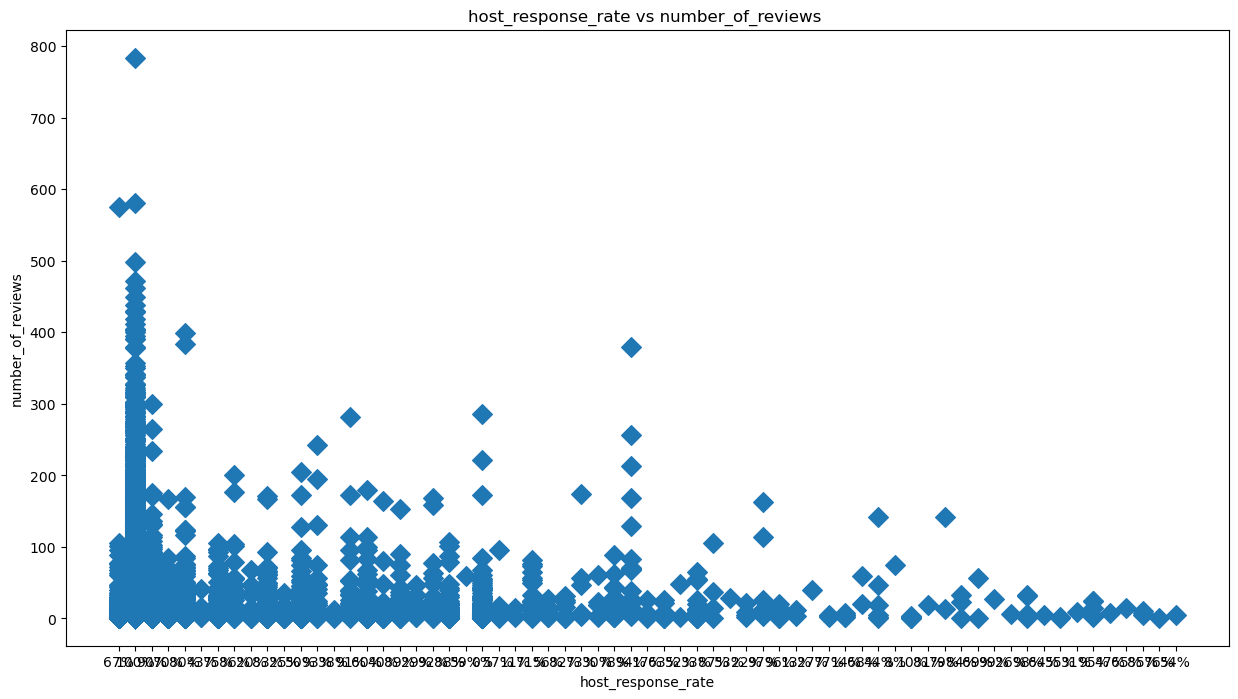

select which menu whoud you like:
    
    [1]   :The proportion of number of bedrooms of Airbnb listing using pie chart.
 
    
    [2]   :The number of listings for each room type using bar chart.

    
    [3]   :The relationship between accommodates and price using scatter plot rating.

    
    [4]   :Subplots of airbnb prices from 2019 -2022.
  
    
    [4]   :The relation between host response time and number of reviews.

    
    [exit]:Exit the programme.                
    
your selection: exit
select which menu whoud you like:
    
    [first]:Retrieve data.
 
    
    [second]:Analyse data.

    
    [third]:visualise data.

    
    [exit]:Exit the programme.
    
your selection: exit


In [1]:
# Main module 

import tui
import retrieve        
import os    
import analyse
import plot




def run():
    file_path = input("Enter the file path: ")
    running=True
    while running:
        
        selection = tui.main_menu()
        
        
        if  selection== 'first':
            
            #ask the user to enter the file path.
            data =[]
            #use os to check file path , call the function load data in the process module if the path exist.
            if os.path.exists(file_path):
                data=retrieve.load_data_csv(file_path)
                tui.completed()
            running=True
            while running:
                menu_selection=retrieve.retrieve_menu()
                if  menu_selection=='1':
                    retrieve.listing_by_id(data)
                elif menu_selection=='2':
                    retrieve.listing_for_specified_location(data)
                elif menu_selection =='3': 
                    retrieve.listing_by_property_type(data)
                elif menu_selection=='4':
                    retrieve.listing_by_location(data)
                elif menu_selection == 'exit':
                    
                    
                    break
                else:
                    tui.error()
                
                
            else: 
                print('envalid file path')
            
           
                    
        elif selection=='second':
            
            data=analyse.load_data_pandas(file_path)
            
            running=True
            while running:
                menu_selection=analyse.analyse_menu()
                if menu_selection=='1':
                    analyse.popular_amenities(data)
                elif menu_selection=='2':
                    analyse.average_price_location(data)
                elif menu_selection=='3':
                    analyse.average_review_location(data)
                elif menu_selection=='4':
                    analyse.average_price_host_is_superhost(data)
                elif menu_selection=='exit':
                
                    
                    break
                else:
                    tui.error()
                    
        elif selection=='third':        
            data=analyse.load_data_pandas(file_path)
            running=True
            while running:
                menu_selection=plot.plot_menu()
                if menu_selection=='1':
                    plot.number_bedrooms(data)
                elif menu_selection=='2':
                    plot.number_listing(data)
                elif menu_selection=='3':
                    plot.relation_accommodates_price(data)
                elif menu_selection=='4':
                    plot.prices_specified_years(data)
                elif menu_selection=='5':
                    plot.relation_response_reviews(data)
                elif menu_selection=='exit':
                
                    break
                else:
                    tui.error()
                    
        elif selection=='exit':  
            
            break
        else:
            tui.error()
            
         
   
            

if __name__== "__main__":
    

    run()




In [ ]:
import pandas as pd
data=pd.read_csv('Airbnb_UK_2022.csv')
data.head(5)

In [ ]:
data['host_since'][0]

In [ ]:
int(data['host_since'][0][-2:])

In [ ]:
data['year']=data['host_since'].apply(lambda x: x[-2:]).astype('int')


In [ ]:
new_data=data[data['year'].between(19,22)]


In [ ]:
new_data.head()

In [ ]:
x=new_data['year']
x

In [ ]:

year19=new_data.loc[new_data.year ==19, ['year','price']]
year19

In [ ]:
year20=new_data.loc[new_data.year ==20, ['year','price']]
year20

In [ ]:
year21=new_data.loc[new_data.year ==21, ['year','price']]
year21

In [ ]:
year22=new_data.loc[new_data.year ==22, ['year','price']]
year22

In [ ]:
group1=new_data.groupby('year').size()
print(group1)

In [ ]:
#Find the average open price and the average volume in each month. 
new_data.groupby('year')['price']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes= plt.subplots(1,2, figsize=(10,5))
axes[0].plot(new_data['year'],new_data['price'])
axes[1].plot(new_data['year'],new_data['price'])
plt.show()             